In [45]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Load the training data into feature matrix, class labels, and event ids:

In [46]:
from proj1_helpers import *
DATA_TRAIN_PATH = '../data/train.csv' # TODO: download train data and supply path here 
y, tX, ids = load_csv_data(DATA_TRAIN_PATH)

## Do your thing crazy machine learning thing here :) ...

In [47]:
from implementations import *

In [48]:
# pre-processing: normalize each feature, then fill bad data with average (0)

num_feature = tX.shape[1]
col_avg = np.zeros(num_feature)
col_std = np.zeros(num_feature)

# calculate the average and stadard deviation of each data coloum
for i in range(num_feature):
    cur_col = tX[:, i]
    if i == num_feature-1:
        good_data = np.where(cur_col!=0)
    else:
        good_data = np.where(cur_col!=-999)
    col_avg[i] = np.mean(cur_col[good_data])
    col_std[i] = np.std(cur_col[good_data])
    
col_avg = col_avg[np.newaxis, :]
col_std = col_std[np.newaxis, :]

# pick bad data
bad_data = np.where(tX==-999)
bad_col_data = np.where(tX[:, -1]==0)

# normalization
tX = (tX-col_avg) / col_std

# filling bad data with average
tX[bad_data] = 0
tX[:, -1][bad_col_data] = 0

In [49]:
# required implementations

max_iters = 50
gamma = 0.1 # least square GD & logistic_regression & reg_logistic_regression
# gamma = 0.001 # least square SGD
# lambda_ = 0.1
# initial_w = np.zeros(tX.shape[1])

# weights, loss = least_squares_GD(y, tX, initial_w, max_iters, gamma)
# weights, loss = least_squares_SGD(y, tX, initial_w, max_iters, gamma)
# weights, loss = least_squares(y, tX)
# weights, loss = ridge_regression(y, tX, lambda_)
# weights, loss = logistic_regression(y, tX, initial_w, max_iters, gamma)
# weights, loss = reg_logistic_regression(y, tX, lambda_, initial_w, max_iters, gamma)

In [50]:
from my_helper import *

In [51]:
# polynomial data augmentation

degree = 10

initial_w = np.zeros(tX.shape[1]*degree)
x_ploy = build_poly(tX, degree)

In [52]:
# ridge regression

K = 5
seed = 6

lambdas = np.logspace(-5, 2, 30)
viz_lambdas = []
viz_train_acc = []
viz_val_acc = []
for lambda_ in lambdas:
    
    # cross validation
    train_acc, val_acc = cross_validation(y, x_ploy, K, seed, ridge_regression, lambda_)

    viz_lambdas.append(lambda_)
    viz_train_acc.append(np.mean(train_acc))
    viz_val_acc.append(np.mean(val_acc))

    print("Lambda {labd}, Train accuracy {ta}, Validation Accuracy {va}".format(labd=lambda_, ta=np.mean(train_acc), va=np.mean(val_acc)))

Lambda 1e-05, Train accuracy 0.816446, Validation Accuracy 0.8160320000000001
Lambda 1.7433288221999873e-05, Train accuracy 0.816446, Validation Accuracy 0.8160360000000001
Lambda 3.039195382313195e-05, Train accuracy 0.816448, Validation Accuracy 0.816028
Lambda 5.2983169062837125e-05, Train accuracy 0.8164480000000001, Validation Accuracy 0.816028
Lambda 9.236708571873866e-05, Train accuracy 0.816451, Validation Accuracy 0.816028
Lambda 0.0001610262027560939, Train accuracy 0.81645, Validation Accuracy 0.816028
Lambda 0.0002807216203941176, Train accuracy 0.8164510000000001, Validation Accuracy 0.816028
Lambda 0.0004893900918477494, Train accuracy 0.8164510000000001, Validation Accuracy 0.816028
Lambda 0.0008531678524172815, Train accuracy 0.8164510000000001, Validation Accuracy 0.816028
Lambda 0.0014873521072935117, Train accuracy 0.8164530000000001, Validation Accuracy 0.8160320000000001
Lambda 0.002592943797404667, Train accuracy 0.8164529999999999, Validation Accuracy 0.816036000

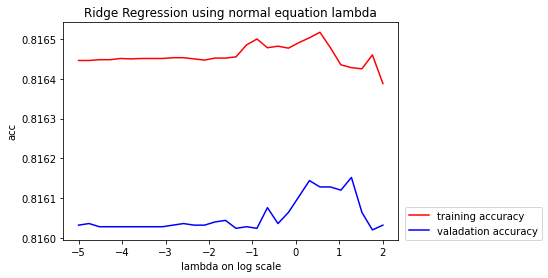

In [53]:
#Redige regression with different lambda_
plt.title('Ridge Regression using normal equation lambda')
plt.plot(np.log10(viz_lambdas), viz_train_acc, color='red', label='training accuracy')
plt.plot(np.log10(viz_lambdas), viz_val_acc, color='blue', label='valadation accuracy')
plt.legend(bbox_to_anchor=(1.02, 0), loc=3, borderaxespad=0)
plt.xlabel('lambda on log scale')
plt.ylabel('acc')
plt.savefig('../fig/Redige Regression lambda.jpg', bbox_inches = 'tight')

In [54]:
max_index = viz_val_acc.index(max(viz_val_acc))
viz_lambdas[max_index]

18.873918221350994

In [55]:
K = 5
seed = 6

lambdas = 18.87391
viz_degree = []
viz_train_acc = []
viz_val_acc = []

for degree in range(1,20):
    x_ploy = build_poly(tX, degree)
    train_acc, val_acc = cross_validation(y, x_ploy, K, seed, ridge_regression, lambda_)

    viz_degree.append(degree)
    viz_train_acc.append(np.mean(train_acc))
    viz_val_acc.append(np.mean(val_acc))

    print("degree {degree}, Train accuracy {ta}, Validation Accuracy {va}".format(degree=degree, ta=np.mean(train_acc), va=np.mean(val_acc)))
    

degree 1, Train accuracy 0.7189880000000001, Validation Accuracy 0.71886
degree 2, Train accuracy 0.7741079999999999, Validation Accuracy 0.773736
degree 3, Train accuracy 0.785348, Validation Accuracy 0.7850360000000001
degree 4, Train accuracy 0.792429, Validation Accuracy 0.792016
degree 5, Train accuracy 0.796217, Validation Accuracy 0.7957
degree 6, Train accuracy 0.798456, Validation Accuracy 0.798204
degree 7, Train accuracy 0.8043849999999999, Validation Accuracy 0.8038399999999999
degree 8, Train accuracy 0.811136, Validation Accuracy 0.8107559999999999
degree 9, Train accuracy 0.8153370000000001, Validation Accuracy 0.814908
degree 10, Train accuracy 0.8163879999999999, Validation Accuracy 0.8160319999999999
degree 11, Train accuracy 0.817825, Validation Accuracy 0.8172519999999999
degree 12, Train accuracy 0.818501, Validation Accuracy 0.817784
degree 13, Train accuracy 0.8085929999999999, Validation Accuracy 0.807476
degree 14, Train accuracy 0.6596219999999999, Validation 

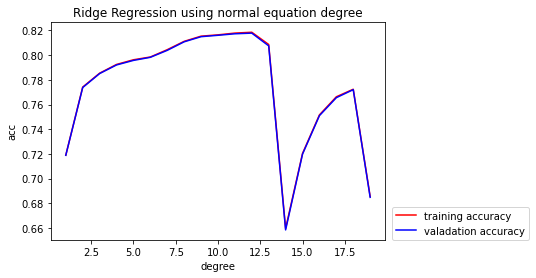

In [56]:
#Redige regression with different lambda_
plt.title('Ridge Regression using normal equation degree')
plt.plot(viz_degree, viz_train_acc, color='red', label='training accuracy')
plt.plot(viz_degree, viz_val_acc, color='blue', label='valadation accuracy')
plt.legend(bbox_to_anchor=(1.02, 0), loc=3, borderaxespad=0)
plt.xlabel('degree')
plt.ylabel('acc')
plt.savefig('../fig/Redige Regression degree.jpg', bbox_inches = 'tight')

In [57]:
# best para of ridge regression


ratio = 0.9
degree = 12
lambda_ = viz_lambdas[max_index]
seed = 6

x_poly = build_poly(tX, degree)
weights, loss = ridge_regression(y, x_poly, lambda_)

pred = predict_labels(weights, x_poly)
acc = cal_acc(y, pred)

print(acc)

0.818552


In [58]:
from my_implementations import *

In [59]:
# polynomial data augmentation

degree = 4

initial_w = np.zeros(tX.shape[1]*degree)
x_train, y_train, x_val, y_val = split_data(tX, y, ratio, seed)
x_train_poly = build_poly(x_train, degree)
x_val_poly = build_poly(x_val, degree)

# best para of logistic regression Newton

max_iters = 50
gamma = 0.4

weights, loss, viz_iter, viz_loss_newton = logistic_regression_newton(y_train, x_train_poly, initial_w, max_iters, gamma)

y_train_pred = predict_labels(weights, x_train_poly)
train_acc = cal_acc(y_train, y_train_pred)
y_val_pred = predict_labels(weights, x_val_poly)
val_acc = cal_acc(y_val, y_val_pred)

print("Train accuracy {ta}, Validation Accuracy {va}".format(ta=train_acc, va=val_acc))

LS GD(0/49): loss=0.5637139415227235
LS GD(1/49): loss=0.5030966742348562
LS GD(2/49): loss=0.4677372180005141
LS GD(3/49): loss=0.44557040517340923
LS GD(4/49): loss=0.4314588391437936
LS GD(5/49): loss=0.42265408880843425
LS GD(6/49): loss=0.4175400244740702
LS GD(7/49): loss=0.41474658332865977
LS GD(8/49): loss=0.41330464986412974
LS GD(9/49): loss=0.4125344840243005
LS GD(10/49): loss=0.4121563870222903
LS GD(11/49): loss=0.4119734319873034


d:\Git download\ml-project-1-ssy_mlproject1\project1\scripts\implementations.py:64: RuntimeWarning: overflow encountered in exp
  def logistic_loss(y, tx, w):


LS GD(12/49): loss=0.41188579198219466
LS GD(13/49): loss=0.411841904547579
LS GD(14/49): loss=0.41181806767351203
LS GD(15/49): loss=0.41180360280149014
LS GD(16/49): loss=0.4117943429623032
LS GD(17/49): loss=0.411788655507804
LS GD(18/49): loss=0.41178526809622057
LS GD(19/49): loss=0.4117255394270488
LS GD(20/49): loss=0.4117181523566
LS GD(21/49): loss=0.411712405232709
LS GD(22/49): loss=0.41170793330665395
LS GD(23/49): loss=0.41170445399334615
LS GD(24/49): loss=0.41170174742434884
LS GD(25/49): loss=0.4116996423062013
LS GD(26/49): loss=0.41169800517635796
LS GD(27/49): loss=0.41169673208122765
LS GD(28/49): loss=0.4116957420855622
LS GD(29/49): loss=0.41169497220167817
LS GD(30/49): loss=0.41169437342844367
LS GD(31/49): loss=0.4116939076589182
LS GD(32/49): loss=0.41169354526755814
LS GD(33/49): loss=0.41169326322865674
LS GD(34/49): loss=0.4116930436498112
LS GD(35/49): loss=0.41169287262949933
LS GD(36/49): loss=0.41169273936766804
LS GD(37/49): loss=0.4116926354737318
LS 

In [60]:
# best para of logistic regression 
degree = 1
gamma = 1
initial_w = np.zeros(tX.shape[1]*degree)
x_train, y_train, x_val, y_val = split_data(tX, y, ratio, seed)
x_train_poly = build_poly(x_train, degree)
x_val_poly = build_poly(x_val, degree)
weights, loss, viz_iter, viz_loss_normal = logistic_regression(y_train, x_train_poly, initial_w, max_iters, gamma)

y_train_pred = predict_labels(weights, x_train_poly)
train_acc = cal_acc(y_train, y_train_pred)
y_val_pred = predict_labels(weights, x_val_poly)
val_acc = cal_acc(y_val, y_val_pred)

print("Train accuracy {ta}, Validation Accuracy {va}".format(ta=train_acc, va=val_acc))

Logistic Regression GD(0/49): loss=0.6308364529766145
Logistic Regression GD(1/49): loss=0.6108241778513857
Logistic Regression GD(2/49): loss=0.6012718240009614
Logistic Regression GD(3/49): loss=0.5956086507481423
Logistic Regression GD(4/49): loss=0.5918393536582911
Logistic Regression GD(5/49): loss=0.5891139147961404
Logistic Regression GD(6/49): loss=0.5870194898349704
Logistic Regression GD(7/49): loss=0.5853351436856999
Logistic Regression GD(8/49): loss=0.5839332043319674
Logistic Regression GD(9/49): loss=0.5827351528862945
Logistic Regression GD(10/49): loss=0.5816901681462707
Logistic Regression GD(11/49): loss=0.580763930410249
Logistic Regression GD(12/49): loss=0.579932419244932
Logistic Regression GD(13/49): loss=0.5791782980184818
Logistic Regression GD(14/49): loss=0.5784887127621605
Logistic Regression GD(15/49): loss=0.5778539016743691
Logistic Regression GD(16/49): loss=0.5772662887221848
Logistic Regression GD(17/49): loss=0.5767198767824333
Logistic Regression GD

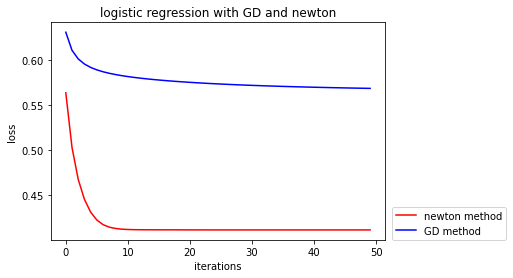

In [61]:
#logistic regression with GD and newton
plt.title('logistic regression with GD and newton')
plt.plot(viz_iter, viz_loss_newton, color='red', label='newton method')
plt.plot(viz_iter, viz_loss_normal, color='blue', label='GD method')
plt.legend(bbox_to_anchor=(1.02, 0), loc=3, borderaxespad=0)
plt.xlabel('iterations')
plt.ylabel('loss')
plt.savefig('../fig/logistic regression with GD and newton', bbox_inches = 'tight')

Train accuracy 0.72664, Validation Accuracy 0.72644
Train accuracy 0.8020133333333334, Validation Accuracy 0.80256
Train accuracy 0.8101422222222222, Validation Accuracy 0.8098


d:\Git download\ml-project-1-ssy_mlproject1\project1\scripts\implementations.py:64: RuntimeWarning: overflow encountered in exp
  return 1 / (1+np.exp(-t))


Train accuracy 0.8168133333333333, Validation Accuracy 0.81596
Train accuracy 0.5657866666666667, Validation Accuracy 0.57092
Train accuracy 0.6682533333333334, Validation Accuracy 0.673
Train accuracy 0.5238177777777778, Validation Accuracy 0.52936
Train accuracy 0.6032488888888888, Validation Accuracy 0.6032
Train accuracy 0.5350133333333333, Validation Accuracy 0.54136
Train accuracy 0.6525777777777778, Validation Accuracy 0.65576
Train accuracy 0.5257822222222223, Validation Accuracy 0.52736
Train accuracy 0.6646888888888889, Validation Accuracy 0.671
Train accuracy 0.5564711111111111, Validation Accuracy 0.56336
Train accuracy 0.5573022222222223, Validation Accuracy 0.5624
Train accuracy 0.4286977777777778, Validation Accuracy 0.4274
Train accuracy 0.6334, Validation Accuracy 0.63484
Train accuracy 0.5425155555555555, Validation Accuracy 0.5416
Train accuracy 0.3434622222222222, Validation Accuracy 0.33828
Train accuracy 0.54212, Validation Accuracy 0.54144
Train accuracy 0.34348,

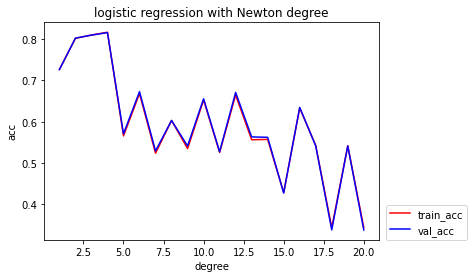

In [69]:
# best para of logistic regression Newton

max_iters = 50
gamma = 0.4

viz_degrees = []
viz_train_acc = []
viz_val_acc = []

for degree in range(1, 21):
    x_train, y_train, x_val, y_val = split_data(tX, y, ratio, seed)
    x_train_poly = build_poly(x_train, degree)
    x_val_poly = build_poly(x_val, degree)  
    initial_w = np.zeros(tX.shape[1]*degree)
    weights, loss, viz_iter, viz_loss_newton = logistic_regression_newton(y_train, x_train_poly, initial_w, max_iters, gamma)

    y_train_pred = predict_labels(weights, x_train_poly)
    train_acc = cal_acc(y_train, y_train_pred)
    y_val_pred = predict_labels(weights, x_val_poly)
    val_acc = cal_acc(y_val, y_val_pred)

    print("Train accuracy {ta}, Validation Accuracy {va}".format(ta=train_acc, va=val_acc))
    viz_degrees.append(degree)
    viz_train_acc.append(train_acc)
    viz_val_acc.append(val_acc)

#logistic regression with Newton degree
plt.title('logistic regression with Newton degree')
plt.plot(viz_degrees, viz_train_acc, color='red', label='train_acc')
plt.plot(viz_degrees, viz_val_acc, color='blue', label='val_acc')
plt.legend(bbox_to_anchor=(1.02, 0), loc=3, borderaxespad=0)
plt.xlabel('degree')
plt.ylabel('acc')
plt.savefig('../fig/logistic regression with Newton degree', bbox_inches = 'tight')


## Generate predictions and save ouput in csv format for submission:

In [62]:
DATA_TEST_PATH = '../data/test.csv' # TODO: download train data and supply path here 
_, tX_test, ids_test = load_csv_data(DATA_TEST_PATH)

# pre-process
bad_data = np.where(tX_test==-999)
bad_col_data = np.where(tX_test[:, -1]==0)

tX_test = (tX_test-col_avg) / col_std
tX_test[bad_data] = 0
tX_test[:, -1][bad_col_data] = 0

In [63]:
OUTPUT_PATH = 'predictions.csv' # TODO: fill in desired name of output file for submission

# polynomial data augmentation
x_test_poly = build_poly(tX_test, degree)
y_pred = predict_labels(weights, x_test_poly)
create_csv_submission(ids_test, y_pred, OUTPUT_PATH)